# Period consumer complaint to company

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dtypes = {
    'Product': "category",
    'Sub-product': "category",
    'Issue': "category",
    'Sub-issue':"category",
    'Consumer complaint narrative':str,
    'Company public response': "category",
    'Company':"category",
    'State':"category",
    'Tags':"category",
    'Consumer consent provided?':bool,
    'Submitted via':"category",
    'Company response to consumer':"category",
    'Timely response?':bool,
    'Consumer disputed?':bool,
    'Complaint ID':int
}

In [3]:
# get data
data = pd.read_sql_query("SELECT * FROM 'mortgage complaints'"
                , "sqlite:///StaterData.db"
                , parse_dates={'Date received': '%Y-%m-%d %H:%M:%S'
                , 'Date sent to company': '%Y-%m-%d %H:%M:%S'}, dtype=dtypes)

In [4]:
data.head()

,index,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,4,2023-01-16,Mortgage,Conventional home mortgage,Struggling to pay mortgage,None,I have been dealing with Select Portfolio Serv...,Company believes it acted appropriately as aut...,"SELECT PORTFOLIO SERVICING, INC.",IN,463XX,None,True,Web,2023-01-16,Closed with explanation,True,True,6440191
1,6,2023-01-15,Mortgage,FHA mortgage,Applying for a mortgage or refinancing an exis...,None,I am unable to obtain a standard loan estimate...,None,Fairway Independent Mortgage Corporation,NY,11207,None,True,Web,2023-01-16,Closed with explanation,True,True,6440122
2,10,2023-01-16,Mortgage,VA mortgage,Closing on a mortgage,None,"CFPB\t\tComplaint by XXXX, XXXX XXXX, & wife X...",Company believes it acted appropriately as aut...,Village Capital & Investment LLC,ID,838XX,Servicemember,True,Web,2023-02-06,Closed with explanation,True,True,6442766
3,11,2021-11-02,Mortgage,VA mortgage,Trouble during payment process,None,Purpose : Out of forbearance to refinance with...,None,"Caliber Home Loans, Inc.",WA,98038,Servicemember,True,Web,2021-11-02,Closed with explanation,True,True,4868722
4,12,2019-01-29,Mortgage,Other type of mortgage,Trouble during payment process,None,This is the second part of the issue with this...,None,NATIONSTAR MORTGAGE LLC,NM,870XX,None,True,Web,2019-01-29,Closed with explanation,True,True,3136715


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104434 entries, 0 to 104433
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   index                         104434 non-null  int64         
 1   Date received                 104434 non-null  datetime64[ns]
 2   Product                       104434 non-null  category      
 3   Sub-product                   104434 non-null  category      
 4   Issue                         104434 non-null  category      
 5   Sub-issue                     104434 non-null  category      
 6   Consumer complaint narrative  104434 non-null  object        
 7   Company public response       104434 non-null  category      
 8   Company                       104434 non-null  category      
 9   State                         104434 non-null  category      
 10  ZIP code                      104434 non-null  object        
 11  Tags         

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,104434.0,1.660976e+05,1.011825e+05,4.0,75694.25,165924.5,233361.75,376834.0
Complaint ID,104434.0,3.381588e+06,1.438784e+06,1290155.0,2207407.50,3136187.5,4275512.00,6943575.0


In [7]:
data.corr()

,index,Consumer consent provided?,Timely response?,Consumer disputed?,Complaint ID
index,1.000000,NaN,-0.263909,0.010632,-0.305431
Consumer consent provided?,NaN,NaN,NaN,NaN,NaN
Timely response?,-0.263909,NaN,1.000000,0.006762,0.578939
Consumer disputed?,0.010632,NaN,0.006762,1.000000,0.005250
Complaint ID,-0.305431,NaN,0.578939,0.005250,1.000000


In [8]:
df = data.copy()
df['response_in_days'] = (data['Date sent to company'] - data['Date received']).dt.days
# df['response_in_days'] = df['response_in_days'].astype('category')

In [9]:
df['response_in_days'].describe().transpose()

count    104434.000000
mean          1.673909
std           8.163208
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         608.000000
Name: response_in_days, dtype: float64

In [10]:
# count frequency of 'response_in_days' values with groupby
df['count_response_in_days'] = df.groupby('response_in_days')['response_in_days'].transform('count')

In [11]:
# get values of response_in_days less than 63 (approximately 2 months)
df_response_days = df[df['response_in_days'] < 63].copy()

In [12]:
df_response_days['response_in_days'].value_counts().sort_index()

0     86819
1      3748
2      1968
3      1473
4      1426
      ...  
58        2
59       14
60       14
61       10
62       11
Name: response_in_days, Length: 63, dtype: int64

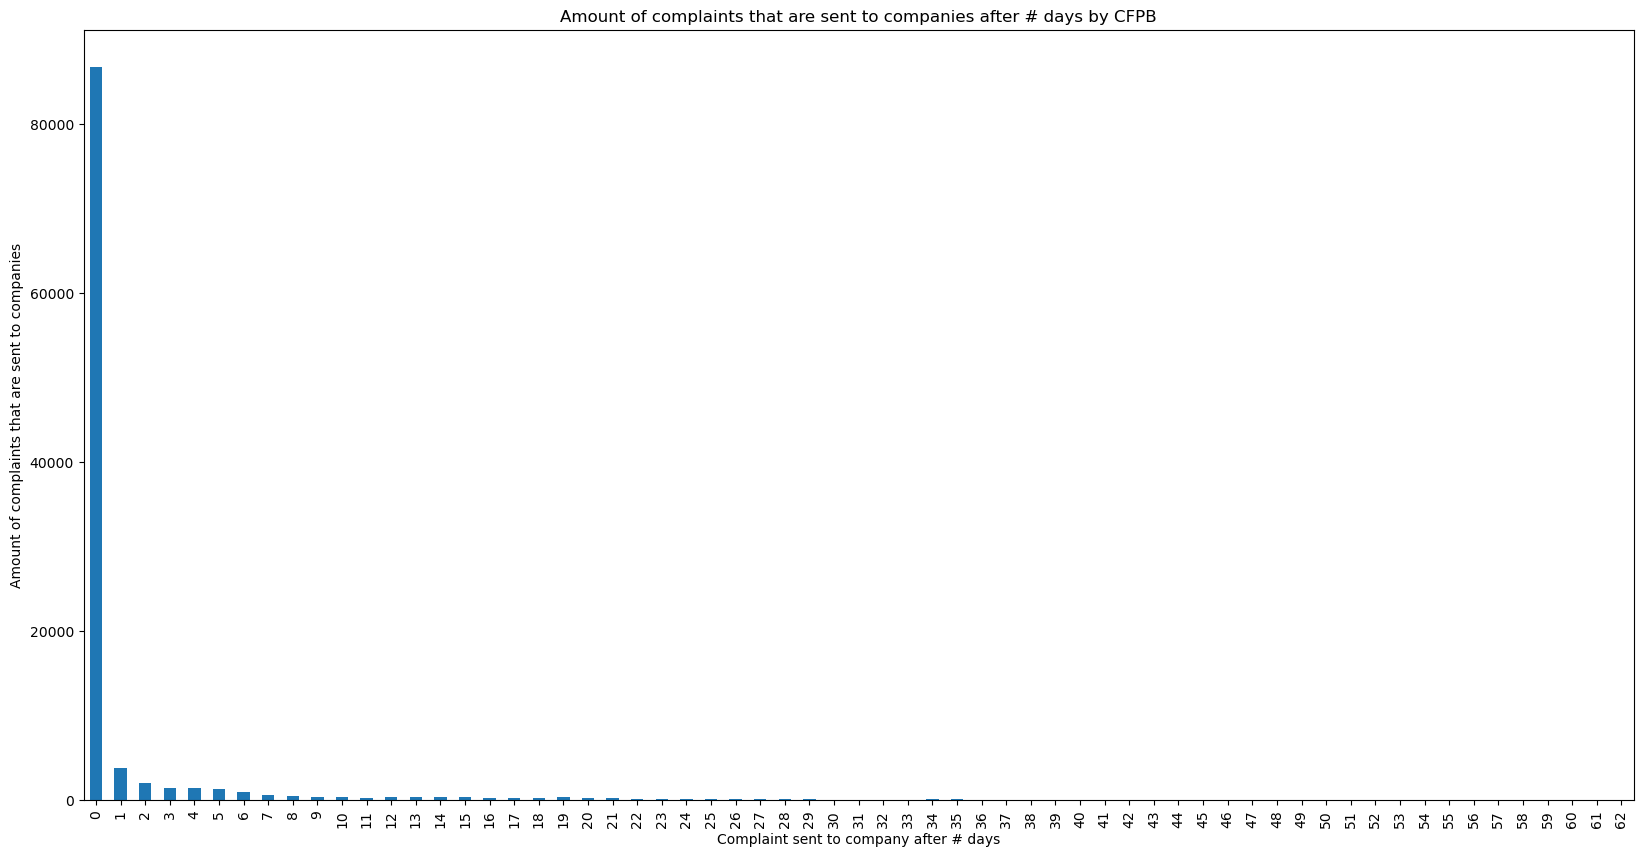

In [13]:
plt.figure(figsize=(20,10))

chart = df_response_days['response_in_days'].value_counts().sort_index().plot(kind='bar', xlabel='Complaint sent to company after # days', ylabel='Amount of complaints that are sent to companies', title="Amount of complaints that are sent to companies after # days by CFPB")
plt.show()

In [14]:
# get values of response_in_days less than 32 (approximately 1 month) and not the day the complaint was sent (0)
df_response_days = df_response_days[(df['response_in_days'] < 46) & (df_response_days['response_in_days'] > 0)]
df_response_days.shape

C:\Users\Cindy\AppData\Local\Temp\ipykernel_22100\108022881.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_response_days = df_response_days[(df['response_in_days'] < 46) & (df_response_days['response_in_days'] > 0)]


(17131, 21)

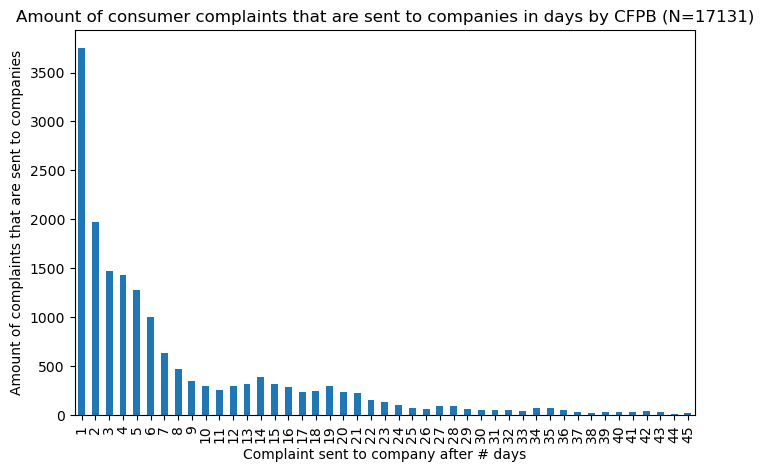

In [15]:
plt.figure(figsize=(8,5))
chart = df_response_days['response_in_days'].value_counts().sort_index().plot(kind='bar', xlabel='Complaint sent to company after # days', ylabel='Amount of complaints that are sent to companies', title="Amount of consumer complaints that are sent to companies in days by CFPB (N=17131)")
plt.show()

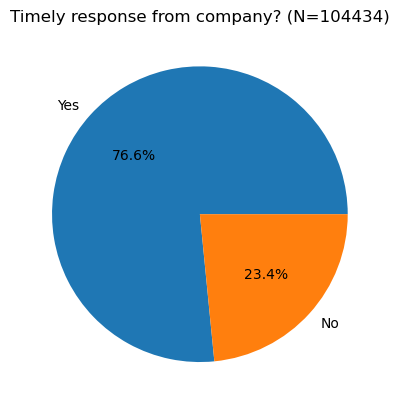

In [16]:
# Timely response pie overview
fig, ax = plt.subplots()
ax.pie(df['Timely response?'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')

plt.title('Timely response from company? (N=104434)')
plt.show()